In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
from matplotlib import rcParams

In [2]:
params = {
   'axes.labelsize': 15,
   'font.size': 15,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

#Color-blind friendly pallete
colors = [
    "#0C7BDC",  # Vibrant Blue
    "#E66100",  # Bright Orange
    "#40B0A6",  # Teal/Aqua
    "#8B8D8B",  # Medium Grey
    "#5D3A9B"   # Muted Purple
]

vib_blue = "#0C7BDC"
teal = "#40B0A6"
purple = "#5D3A9B" 

In [3]:
M_Earth = 5.972 * 10**27 #g
R_Earth = 6.371 * 10**8 #g

def sigrho(M, sM, R, sR):
    t1 = (5.51*sM/(R**3))
    t2 = (3.0*5.51*M/(R**4))*sR
    return np.sqrt((t1**2) + (t2**2))

def get_rho(M, R):
    rho = M/((4/3) * np.pi * R**3) * (M_Earth/R_Earth**3)
    return rho

In [4]:
elike = pd.read_csv('elike.csv')
elike = si.interp1d(elike['mass'], elike['density'], fill_value = 'extrapolate')

pfe = pd.read_csv('EP_purefe.csv')
pfe = si.interp1d(pfe['mass'], pfe['rho'], fill_value = 'extrapolate')

merclike = pd.read_csv('Mercury-like.csv')
merclike['rho'] = get_rho(merclike['mass'], merclike['radius'])
merclike = si.interp1d(merclike['mass'], merclike['rho'], fill_value = 'extrapolate')

In [5]:
#Read in NEA file -- the NEA file contains all 
data = pd.read_csv('PS_2025.08.12_13.58.03.csv', skiprows = 96)

data = data.iloc[np.where(data['pl_controv_flag'] == 0)]
data = data.iloc[np.where(data['default_flag'] == 1)]
data = data.iloc[np.where(np.isnan(data['pl_rade']) == False)]
data = data.iloc[np.where(data['pl_radelim'] == 0)]
data = data.iloc[np.where(np.isnan(data['pl_bmasse']) == False)]
data = data.iloc[np.where(data['pl_bmasselim'] == 0)]
data = data.iloc[np.where(np.isnan(data['st_teff']) == False)]

data['rho'] = 5.51*data['pl_bmasse']/(data['pl_rade']**3)


data['Merr'] = (data['pl_bmasseerr1'] + abs(data['pl_bmasseerr2']))/2.0
data['Rerr'] = (data['pl_radeerr1'] + abs(data['pl_radeerr2']))/2.0

data['srho'] = sigrho(data['pl_bmasse'], data['Merr'],
                      data['pl_rade'], data['Rerr'])

data_high_density = data.iloc[np.where(data['rho'] > elike(data['pl_bmasse']))]


In [6]:
exo_mercs_list = pd.read_csv('exo-mercs_list.csv')
# Filter data to include only those planets that are in exo_mercs_list
plot_mercs = data[data['pl_name'].isin(exo_mercs_list['pl_name'])]
#plot_mercs = data

In [95]:
#ax[0].scatter(notables['pl_bmasse'], notables['rho'], color = 'red', s = 100)

#ax[0].annotate('K2-38 b',
#               xy=(notables['pl_bmasse'].values[0], notables['rho'].values[0]),
#               xytext=(5, 5), textcoords='offset points',
#               fontsize=9, color='red',
#               arrowprops=dict(arrowstyle='->', lw=0.5))
#ax[0].plot(data['pl_bmasse'].iloc[ind_nobs], data['rho'].iloc[ind_nobs], 'ro', fillstyle = 'none', markersize = 10)

/var/folders/g0/fl404sj151l2v9xcdkjz9fq80000gn/T/ipykernel_53484/2201324578.py:35: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax[0].set_xlim(min(data['pl_bmasse'])-0.1, 30)
/var/folders/g0/fl404sj151l2v9xcdkjz9fq80000gn/T/ipykernel_53484/2201324578.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(0, 30)
/var/folders/g0/fl404sj151l2v9xcdkjz9fq80000gn/T/ipykernel_53484/2201324578.py:55: RuntimeWarning: invalid value encountered in power
  ax[1].plot(x, (5.51*x/elike(x))**(1.0/3.0), 'g-', lw = 3)
/var/folders/g0/fl404sj151l2v9xcdkjz9fq80000gn/T/ipykernel_53484/2201324578.py:56: RuntimeWarning: invalid value encountered in power
  ax[1].plot(x, (5.51*x/pfe(x))**(1.0/3.0), '-', color = 'gray', lw = 3)
/var/folders/g0/fl404sj151l2v9xcdkjz9fq80000gn/T/ipykernel_53484/2201324578.py:57: RuntimeWarning: invalid value encountered in power
  ax[1].plot(x, (5.51*x/merclike(x))**(1.0/3.0), '-', colo

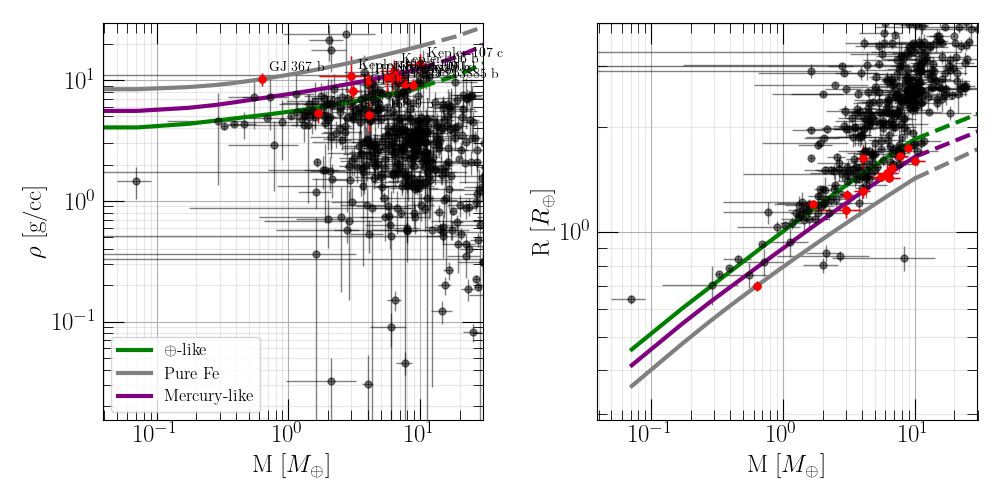

In [96]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))

ax[0].errorbar(data['pl_bmasse'], data['rho'], yerr = data['srho'], xerr = data['Merr'], markersize = 5, lw = 0, 
               elinewidth = 1, color = 'k', marker = 'o', alpha = 0.5)

ax[0].errorbar(plot_mercs['pl_bmasse'], plot_mercs['rho'], yerr = plot_mercs['srho'], xerr = plot_mercs['Merr'], markersize = 5, lw = 0, 
               elinewidth = 1, color = 'r', marker = 'o', alpha = 1)

for i, row in plot_mercs.iterrows():
    ax[0].annotate(
        row['pl_name'],
        xy=(row['pl_bmasse'], row['rho']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=10,
        color='black'
    )


x = np.linspace(min(data['pl_bmasse']) - 0.1, 10, 100)
ax[0].plot(x, elike(x), 'g-', lw = 3, label = r'$\oplus$-like')
ax[0].plot(x, pfe(x), '-', color = 'gray', lw = 3, label = 'Pure Fe')
ax[0].plot(x, merclike(x), '-', color = 'purple', lw = 3, label = 'Mercury-like')
ax[0].legend(fontsize = 12)


x = np.linspace(10.0,  max(data['pl_bmasse'])+10.0, 1000)
ax[0].plot(x, elike(x), 'g--', lw = 3)
ax[0].plot(x, pfe(x), '--', color = 'gray', lw = 3)
ax[0].plot(x, merclike(x), '--', color = 'purple', lw = 3)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
#ax[0].set_xlim(min(data['pl_bmasse'])-0.1, max(data['pl_bmasse']) + 1)
ax[0].set_xlim(min(data['pl_bmasse'])-0.1, 30)
ax[0].set_ylim(0, 30)

ax[0].tick_params(which = 'major', length = 15, direction = 'in', top = True, right = True, labelsize = 18)
ax[0].tick_params(which = 'minor', length = 7.5, direction = 'in', top = True, right = True)

ax[0].grid()
ax[0].grid(which = 'minor', alpha = 0.3)

ax[0].set_ylabel(r'$\rho$ [g/cc]', fontsize = 18)
ax[0].set_xlabel(r'M [$M_\oplus$]', fontsize = 18)



ax[1].errorbar(data['pl_bmasse'], data['pl_rade'], xerr = data['Merr'], yerr = data['Rerr'], markersize = 5,
             marker = 'o', lw = 0, elinewidth = 1, color = 'k', alpha = 0.5)
ax[1].errorbar(plot_mercs['pl_bmasse'], plot_mercs['pl_rade'], yerr = plot_mercs['Rerr'], xerr = plot_mercs['Merr'], markersize = 5, lw = 0, 
               elinewidth = 1, color = 'r', marker = 'o', alpha = 1)

x = np.linspace(min(data['pl_bmasse']) - 0.1, 10, 100)
ax[1].plot(x, (5.51*x/elike(x))**(1.0/3.0), 'g-', lw = 3)
ax[1].plot(x, (5.51*x/pfe(x))**(1.0/3.0), '-', color = 'gray', lw = 3)
ax[1].plot(x, (5.51*x/merclike(x))**(1.0/3.0), '-', color = 'purple', lw = 3)

x = np.linspace(10.0,  max(data['pl_bmasse'])+10.0, 100)
ax[1].plot(x, (5.51*x/elike(x))**(1/3.0), 'g--', lw = 3)
ax[1].plot(x, (5.51*x/pfe(x))**(1/3.0), '--', color = 'gray', lw = 3)
ax[1].plot(x, (5.51*x/merclike(x))**(1/3.0), '--', color = 'purple', lw = 3)

ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlim(min(data['pl_bmasse'])-0.1, 30)
ax[1].set_ylim(0,4)

ax[1].tick_params(which = 'major', length = 15, direction = 'in', top = True, right = True, labelsize = 18)
ax[1].tick_params(which = 'minor', length = 7.5, direction = 'in', top = True, right = True)

ax[1].grid()
ax[1].grid(which = 'minor', alpha = 0.3)


ax[1].set_ylabel(r'R [$R_\oplus$]', fontsize = 18)
ax[1].set_xlabel(r'M [$M_\oplus$]', fontsize = 18)

#ax[1].plot([8.21], [1.725], 'rs', markersize = 10)


plt.tight_layout()


/var/folders/g0/fl404sj151l2v9xcdkjz9fq80000gn/T/ipykernel_2028/1313976909.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_backgrounds = ax.scatter(


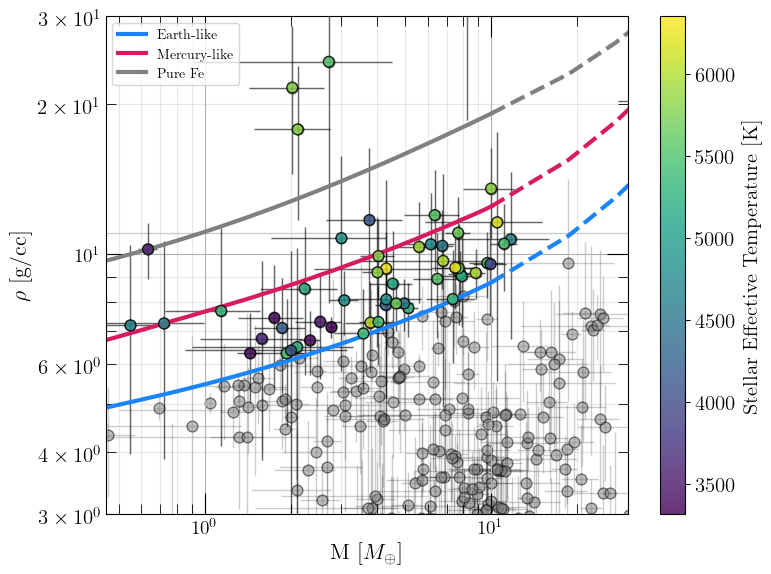

In [7]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(8, 6))

# All planets (background)
ax.errorbar(data['pl_bmasse'], data['rho'],
            yerr=data['srho'], xerr=data['Merr'],
            markersize=0, lw=0, elinewidth=1, color='black', marker='o', alpha=0.2, zorder=0)


ax.errorbar(data_high_density['pl_bmasse'], data_high_density['rho'],
            yerr=data_high_density['srho'], xerr=data_high_density['Merr'],
            markersize=0, lw=0, elinewidth=1, color='black', marker='o', alpha=0.5, zorder = 2)

# Model curves (low mass range)
x = np.linspace(min(data['pl_bmasse']) - 0.1, 10, 100)
ax.plot(x, elike(x), '-', lw=3, label='Earth-like', color = '#1A85FF')
ax.plot(x, merclike(x), '-', color='#D81B60', lw=3, label='Mercury-like')
ax.plot(x, pfe(x), '-', color='gray', lw=3, label='Pure Fe')

# Model curves (extended mass range)
x = np.linspace(10.0, max(data['pl_bmasse']) + 1, 1000)
ax.plot(x, elike(x), '--', lw=3, color = '#1A85FF')
ax.plot(x, pfe(x), '--', color='gray', lw=3)
ax.plot(x, merclike(x), '--', color='#D81B60', lw=3)


scatter = ax.scatter(
    data_high_density['pl_bmasse'], data_high_density['rho'],
    c=data_high_density['st_teff'],  # This parameter colors points based on 'st_teff'
    cmap='viridis',     # Choose a colormap, 'viridis' is a good choice
    s=60,               # Size of the markers
    alpha=0.8,          # Transparency
    edgecolors='black', # Edge color for better visibility
    zorder = 5
)

scatter_backgrounds = ax.scatter(
    data['pl_bmasse'], data['rho'],
    c='grey',  # This parameter colors points based on 'st_teff'
    cmap='viridis',     # Choose a colormap, 'viridis' is a good choice
    s=60,               # Size of the markers
    alpha=0.5,          # Transparency
    edgecolors='black', # Edge color for better visibility
    zorder = 1
)

cbar = fig.colorbar(scatter, ax=ax, label='Stellar Effective Temperature [K]')



# Axis scaling and limits
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(min(data_high_density['pl_bmasse'])-0.1, 30)
ax.set_ylim(3, 30)

# Tick formatting
ax.tick_params(which='major', length=15, direction='in', top=True, right=True, labelsize=14)
ax.tick_params(which='minor', length=7.5, direction='in', top=True, right=True)

# Grid
ax.grid()
ax.grid(which='minor', alpha=0.3)

# Labels
ax.set_ylabel(r'$\rho$ [g/cc]', fontsize=16)
ax.set_xlabel(r'M [$M_\oplus$]', fontsize=16)

# Legend outside
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # remove duplicates
#ax.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
ax.legend()
plt.tight_layout()


#plt.savefig('exo_merc_teff.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [8]:
mass_fil = data[(data['pl_bmasse'] > 3.2) & (data['pl_bmasse'] < 3.4)]
kepler_595_c = mass_fil[mass_fil['pl_name'] == "Kepler-595 c"]
kepler_595_c
print(kepler_595_c['st_teff'])

Series([], Name: st_teff, dtype: float64)


In [9]:
kepler_595_c

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,rho,Merr,Rerr,srho


In [10]:
elike(kepler_595_c['rho'])

array([], dtype=float64)

In [11]:
print(data_high_density['rho'])

397        11.025643
482         9.129020
663        10.212305
669         7.445779
725         7.126440
853         7.897832
861         7.102794
2200        9.901912
2882        9.156426
3037        7.183407
3039        7.248100
3073        9.345602
3471       20.294583
3881        7.784769
4242        9.018173
4308        7.953845
4366        7.684606
4877        8.115271
5044        8.913014
5147        6.499247
5285        8.102368
5371        9.359407
6349        8.515715
6377     1830.432668
6497       11.570512
6641        9.182936
6961       10.756115
7408       10.333612
7713       13.528101
8641       10.693584
10666       7.277942
11070      76.695113
19055      21.576444
19061      17.777672
19355       9.589526
19762       9.385902
23863       9.681921
26322      11.965124
26337      24.314431
26354       6.310562
32153      10.384392
33918       7.952693
34676      10.453015
34840       6.701048
34852       6.759616
35641       7.301784
35654       9.543066
35741      11

In [12]:
elike

In [14]:
data_high_density.to_csv("high_density_exoplanets.csv")